<a href="https://colab.research.google.com/github/csyusharon/machine-learning/blob/main/Programming_Sessions/Programming_Session_5/Programming_Session_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 6 - Introduction to Sequence Models - </center>



**Introduction:**

This session aims to explore two fundamental aspects of sequence modeling: a Numpy implementation of a standard Recurrent Neural Network (RNN) and the classification of MNIST digits using Long Short-Term Memory (LSTM) networks.

**Challenge:**

The primary challenge involves grasping the intricacies of sequence modeling techniques, understanding their implementation from scratch, and then applying them to a real-world dataset like MNIST for accurate digit classification. For the Numpy-based RNN, the challenge lies in comprehensively implementing the core functionality of RNNs using only Numpy operations. Meanwhile, for the LSTM-based MNIST classification, the challenge is to understand the complexities of LSTM cells and effectively utilize them to classify handwritten digits.

**Dataset Overview:**

The MNIST dataset, a classic benchmark dataset, consists of 28x28 grayscale images of handwritten digits ranging from 0 to 9. Each image is accompanied by a corresponding label indicating the digit it represents. This dataset serves as an ideal starting point for experimenting with various sequence modeling techniques.

**Objectives:**

1. **Numpy Implementation of Standard RNN:**
   - Understand the architecture and functioning of standard RNNs.
   - Implement a basic RNN using Numpy, focusing on forward propagation.

2. **MNIST Classification Using LSTM:**
   - Explore the concept of Long Short-Term Memory (LSTM) networks.
   - Train and evaluate the LSTM model on the MNIST dataset for accurate digit classification.


# 1. Numpy implementation of a standard RNN

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1vXVUvFIFDxYo_sdil2QPJWSCwXwZj27f"></center>

In [1]:
# Import basic libraries
import matplotlib.pyplot as plt # for plotting
import numpy as np # for manipulating arrays
import tensorflow as tf # for creating Neural Networks, we will use it to load data
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

We consider the following hyperparameters:

In [2]:
N = 1000
T = 100
D = 50
d = 20

---
<font color=green>Q1:</font>
<br><font color='green'>
Generate some random data of shape $(N, T, D)$.
</font>

---

In [4]:
size = (N, T, D)
data = np.random.randn(*size)

In [5]:
data.shape

(1000, 100, 50)

In [6]:
data[0].shape

(100, 50)

---
<font color=green>Q2:</font>
<br><font color='green'>
Generate some random weights $W_{hh}, W_{xh}, b_h$
</font>

---

In [9]:
W_hh = np.random.randn(d, d)
W_xh = np.random.randn(D, d)
b_h = np.random.randn(d, )

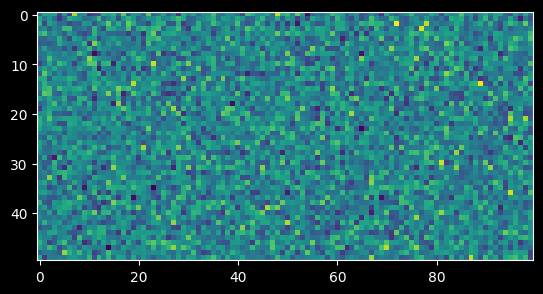

In [12]:
plt.imshow(data[0].T)

---
<font color=green>Q3:</font>
<br><font color='green'>
Produce the output tensor with a shape of $(N, T, d)$ by generating the sequence $y_1, \dots, y_T$ corresponding to each sequence $x_1, \dots, x_T$.
</font>

---

In [13]:
# initialize the output tensor
H = np.zeros((N, T, d))
for i in range(N):
  # Get the sequence i
  X = data[i]
  # initialize h_0 with 0
  h_t_minus_one = np.zeros((d, ))
  # initialize empty list of hidden states sequence_h = [h_1, ...., h_T]
  sequence_h = []
  #loop through all 'words' or elements x_1,...,x_T
  for x_t in X:
    h_t = np.tanh(W_hh.T.dot(h_t_minus_one) + W_xh.T.dot(x_t) + b_h)
    sequence_h.append(h_t)
    h_t_minus_one = h_t

  H[i] = np.array(sequence_h)

---
<font color=green>Q4:</font>
<br><font color='green'>
Plot the shape of the output:
</font>

---

In [14]:
H.shape

(1000, 100, 20)

# 2. MNIST Classification using LSTMs

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1KNpBc60u1QCopXygOff0tLkQNkyXuSmr"></center>

We aim to employ the LSTM layer for classifying the MNIST dataset, which consists of images shaped as $(60000, 28, 28)$. Each sample represents an image with dimensions $(28, 28)$. Viewing each image as a sequence, we can interpret it as having a length of $T = 28,$ with each element having a dimension of $D = 28$.

## 2.1 Loading the MNIST dataset

---
<font color=green>Q5:</font>
<br><font color='green'>
Retrieve the MNIST dataset by utilizing the `tf.keras.datasets.mnist.load_data`function.
</font>

---

In [15]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


---
<font color=green>Q6:</font>
<br><font color='green'>
Print the shape of the data.
</font>

---

In [17]:
X_train.shape

(60000, 28, 28)

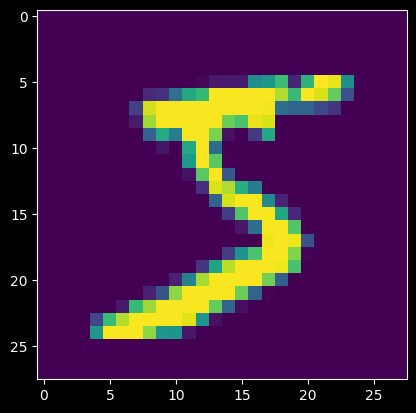

In [18]:
plt.imshow(X_train[0])

---
<font color=green>Q7:</font>
<br><font color='green'>
Normalize the feature train and test data by dividing each pixel element by 255.
</font>

---

In [19]:
X_train = X_train / 255.
#add dot to insure it is a float
X_test = X_test / 255.

---
<font color=green>Q8:</font>
<br><font color='green'>
The targets represent categories ranging from 0 to 9. To encode them into a tensor of shape $(N, 10)$, utilize the to_categorical function from `tensorflow.keras.utils` for one-hot encoding.
</font>

---

In [20]:
len(set(y_train))

10

In [21]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

---
<font color=green>Q9:</font>
<br><font color='green'>
Build the specified model and train it using gradient descent optimization.</font>

---

<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1zCyhgITfxptmBzUDQ7-TPKsKugVyjtat"></center>

In [22]:
# Set hyperparameters
T = X_train.shape[1]
D = X_train.shape[2]
d = 32
M = 64
N_epochs = 10

In [23]:
# Import Modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

In [24]:
model = Sequential([
    LSTM(d, return_sequences=False, input_shape=(T, D)),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,138 (31.79 KB)

 Trainable params: 8,138 (31.79 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

---
<font color=green>Q10:</font>
<br><font color='green'>
Visualize the training and validation loss, as well as the training and validation accuracy, through plots.
</font>

---

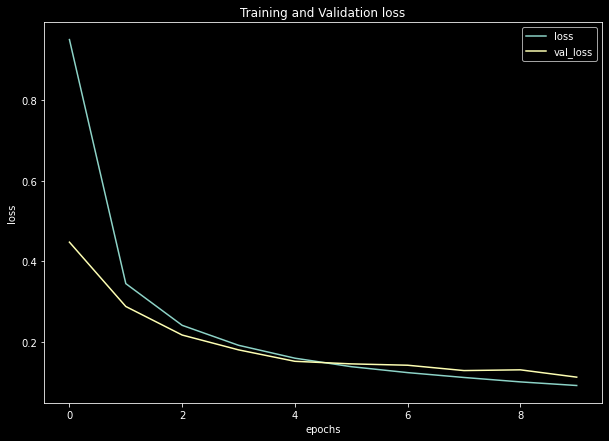

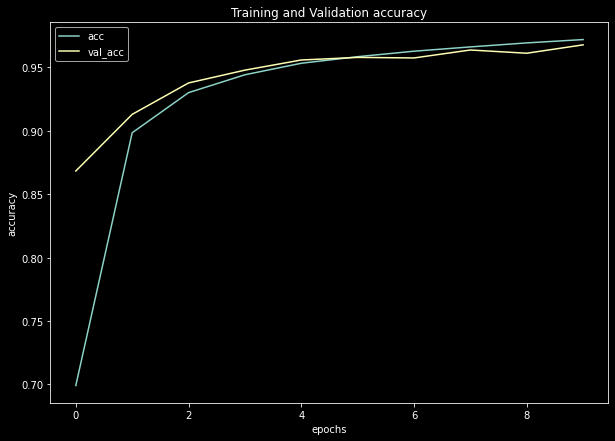

# Wrap-up


In this coding session, we've gained insights into the following:

* Implementing the RNN layer from scratch using Numpy, facilitating a deeper understanding of data transformations.
* Conducting a classification task on data with dimensions (N, T, D) by leveraging LSTM networks.

